## FIT5196 S1-2019 Data Wrangling
________________________________
## Name: Ashwani Kumar Singh
## Student ID: 29968550
## Data Integration and Reshaping Assignment
________________________________

### Importing all the required modules :-

In [115]:
import pandas as pd
import numpy
import matplotlib 
%matplotlib inline
import shapefile
from shapely.geometry import Point
from shapely.geometry import shape
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon    
from matplotlib.collections import PatchCollection
from math import sin, cos, sqrt, atan2, radians
from sklearn import preprocessing
import math
import geopandas
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

/Users/aksingh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## TASK - 1

In [2]:
# Creating data frame for the file 29968550.csv
df = pd.read_csv("29968550.csv")

* After inspecting the "df" data frame, I found that there are some duplicat rows in the data frame.
* So, Dropping the duplicates and keeping the first row of the duplicate.

In [3]:
# Dropping the duplicates.
df = df.drop_duplicates(keep='first')
# Resetting the index of because some rows are dropped
df = df.reset_index()

* For creating crime_df from "crimebylocationdatatable-yearending31march2016.xlsx", I've removed some of the unncessary cells from the file to get only the data that is required for the assignment.

In [4]:
# Crime_df data frame
crime_dataf = pd.read_excel("crimebylocationdatatable-yearending31march2016.xlsx",sheet_name = "Table 1")

In [5]:
crime_dataf.drop(['Unnamed: 0'],axis=1,inplace=True)
crime_dataf.dropna(inplace=True)
new_columns = crime_dataf.iloc[0]
crime_dataf = crime_dataf[1:]
crime_dataf.columns = new_columns
crime_dataf = crime_dataf.reset_index()

In [6]:
crime_df = pd.DataFrame()
crime_df['Apr - Mar reference period'] = crime_dataf['Apr - Mar reference period']
crime_df['Police Region'] = crime_dataf['Police Region']
crime_df['Police Service Area'] =crime_dataf['Police Service Area']
crime_df['Local Government Area'] = crime_dataf['Local Government Area']
crime_df['CSA Offence Division'] = crime_dataf['CSA Offence Division']
crime_df['CSA Offence Subdivision'] = crime_dataf['CSA Offence Subdivision']
crime_df['Offence Count'] = crime_dataf['Offence Count']
crime_df['LGA ERP'] = crime_dataf['LGA ERP']
crime_df['Victorian ERP'] = crime_dataf['Victorian ERP']
crime_df = crime_df.reset_index()

* Creating data frame from councils.txt
* Giving names to two columns as ['Government_Area','Suburbs']

In [7]:
# Creating data frame from councils.txt
councils_df = pd.read_csv('councils.txt', sep=':',names = ['Government_Area','Suburbs'])

In [8]:
# Creating data frame from councils.txt
councils_df = pd.read_csv('councils.txt', sep=':',names = ['Government_Area','Suburbs'])

In [9]:
# # Creating an empty "Suburb" column in "crime_df"
# crime_df['Suburb'] = crime_df.apply(lambda _: '', axis=1)

* In the below code for every "Local Government Area" from crime_df, I'm inputing list of all the suburbs from the from the councils_df.
* rstrip is called on the "councils_df['Government_Area']" because the rows in this column has extra white space at the end, so when comparision is happening, it will have match.
* If any match is found, breaking the inner loop for the next iteration 
* And, finally changing the suburb list to upper case because the "suburb" returned from the polygon is in capital letter. 

In [10]:
for i in range(len(crime_df)):
    for j in range(len(councils_df)):
        if crime_df['Local Government Area'][i] ==  councils_df['Government_Area'][j].rstrip():
            crime_df.loc[i,'Suburbs'] = councils_df['Suburbs'][j].upper()
            break

### Suburb 

* Creating the lat_long_point for finding the suburb of the latitude and longitude.

In [11]:
sgeo = geopandas.read_file("vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp.shp")

In [12]:
list1 = []
for x in range(len(df)):
    z = Point(df["Longtitude"][x],df["Lattitude"][x])
    for y in range(len(sgeo)):
        if sgeo.geometry[y].contains(z):
            list1.append(sgeo.VIC_LOCA_2[y])

* Since I got the list of all the suburbs for the "df" data frame.
* So, creating a "suburb" column in "df"

In [13]:
# creating suburb column in "df" data frame
df['Suburb'] = list1

* Creating empty data frame for all the text files given in the gtfs data set

In [14]:
agency = pd.DataFrame()
calender_dates = pd.DataFrame()
calender = pd.DataFrame()
routes = pd.DataFrame()
shapes = pd.DataFrame()
stop_times = pd.DataFrame()
stops = pd.DataFrame()
trips = pd.DataFrame()

* Merging all the data from different folder of the of gtfs data set
* For merging data from different folder of gtfs, I've created the gtfs file directory in the same way that was given.

In [15]:
gtfs_list = [1,2,3,4,5,6,7,8,10,11]
for i in gtfs_list:
    age_df = pd.read_csv("gtfs/"+ str(i) +"/google_transit/agency.txt")
    cal_dat_df = pd.read_csv("gtfs/"+ str(i) +"/google_transit/calendar_dates.txt")
    cal_df = pd.read_csv("gtfs/"+ str(i) +"/google_transit/calendar.txt")
    rou_df = pd.read_csv("gtfs/"+ str(i) +"/google_transit/routes.txt")
    sha_df = pd.read_csv("gtfs/"+ str(i) +"/google_transit/shapes.txt")
    st_df = pd.read_csv("gtfs/"+ str(i) +"/google_transit/stop_times.txt")
    stop_df = pd.read_csv("gtfs/"+ str(i) +"/google_transit/stops.txt")
    trip_df = pd.read_csv("gtfs/"+ str(i) +"/google_transit/trips.txt")
    
    # Concatening the data from different folder
    agency = pd.concat([agency, age_df], ignore_index=True)
    calender_dates = pd.concat([calender_dates, cal_dat_df], ignore_index=True)
    calender = pd.concat([calender, cal_df], ignore_index=True)
    routes = pd.concat([routes, rou_df], ignore_index=True)
    shapes = pd.concat([shapes, sha_df], ignore_index=True)
    stop_times = pd.concat([stop_times, st_df], ignore_index=True)
    stops = pd.concat([stops, stop_df], ignore_index=True)
    trips = pd.concat([trips, trip_df], ignore_index=True)

### Distance_to_train_station and train_station_id 

* Finding the service id from calendar that has service on monday, tuesday, wednesday, thursday and friday

In [16]:
service_ids=[]
for i in range (len(calender["service_id"])):
    monday = calender["monday"][i]==1
    tuesday = calender["tuesday"][i]==1
    wednesday = calender["wednesday"][i]==1
    thursday = calender["thursday"][i]==1
    friday = calender["friday"][i]==1
    if monday & tuesday & wednesday & thursday & friday:
        service_ids.append(calender["service_id"][i])  
service_ids = set(service_ids)

* Finding the trip id that has same service id as in the service_ids list

In [17]:
trip_ids=[]
for i in range(len(trips)):
    if trips.loc[i,'service_id'] in service_ids :
        trip_ids.append(trips["trip_id"][i])

* The below code will find out the trip id of the trip from stop_times data frame that has stop id equal to the stop id of Southern Cross Railway Station .
* The main purpose of doing this is to find out the trip id that has the direct trip to the Southern Cross Railway Station 

In [18]:
trp = []
for i in range(len(stop_times)):
    if stop_times['stop_id'][i] in [20043,22180]:
        trp.append(stop_times['trip_id'][i])

* Now based on the filtered trp, I need to check the wether trip ids of "trp" are in "trip_ids" or not.
* So, if any of the trip id of trp that is not there in trip_ids needs to be removed.
* So, I'm creating a new filtered trip id .

In [19]:
filtered_id = []
for i in trp:
    if i in trip_ids:
        filtered_id.append(i)

In [20]:
"""
Since the departure time has to be within 7 - 9:30 AM. So, creating two variables of time, one for 7 and other 
for 9:30
""" 
start_time = int('7')*60 + int('0')
end_time = int('9')*60 + int('30')

* The below code will filter trip based on the departure time in the range of 7:00 to 9:30.
* Second filteration is based on filtered_id.

In [21]:
stop_ids = []
filtered_trip_id = set()
for i in range(len(stop_times)):
    split_time = stop_times["departure_time"][i].split(":")
    time = int(split_time[0])*60 + int(split_time[1])
    if time >= start_time and time <= end_time:
        if stop_times["trip_id"][i] in filtered_id:
            filtered_trip_id.add(stop_times['trip_id'][i])
            stop_ids.append(stop_times['stop_id'][i])

In [22]:
"Converting the stop_ids to set to have the unique values of stop_id"
stop_ids = set(stop_ids)

* Next step is to find out the latitude and longitude of the stop id.
* But while working on stops data frame I found some duplicate stop_id in the data of the stops data frame.
* So, before finding the latitude and longitude of the stop id, removing the duplicates stop_id from stops since stop_id is a primary key in stops.

In [23]:
# Removing duplicates stop_id
stops.drop_duplicates(subset='stop_id', keep="last",inplace=True)
# Resetting the index of stops data frame
stops = stops.reset_index()

* stops_id_lat_long is a list that has sub list, this sub list has latitude,longitude and stop_id. 

In [24]:
stops_id_lat_long = []
for i in range(len(stops)):
    if stops['stop_id'][i] in stop_ids:
        id_lat_long = [] 
        id_lat_long.append(stops['stop_id'][i])
        id_lat_long.append(stops['stop_lat'][i])
        id_lat_long.append(stops['stop_lon'][i])
    stops_id_lat_long.append(id_lat_long)

* Distance function which has 4 argument two latitude and two longitude, using these latitude and longitude distance between two point is calculated and finally this function will return the calculated distance

In [25]:
def distance(lattitude1,long1,lattitude2,long2):
# approximate radius of earth in km
    R = 6378
    lat1 = radians(float(lattitude1))
    lon1 = radians(float(long1))
    lat2 = radians(float(lattitude2))
    lon2 = radians(float(long2))
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = (R * c)
    return(distance) 

* After doing all the process nearest_train_station_id and distance_to_train_station are as :-

In [26]:
nearest_train_station_id = []
distance_to_train_station = []
for i in range(len(df)):
    temp_list_for_all_distance = []
    for j in range(len(stops_id_lat_long)):
        temp_list_for_all_distance.append(distance(df['Lattitude'][i],df['Longtitude'][i],stops_id_lat_long[j][1],stops_id_lat_long[j][2]))
    minimum_distance = min(temp_list_for_all_distance)
    index_of_minimum_distance = temp_list_for_all_distance.index(minimum_distance)
    distance_to_train_station.append(minimum_distance*1000)
    nearest_train_station_id.append(stops_id_lat_long[index_of_minimum_distance][0])

* Now, since I've calculated "nearest_train_station_id", so adding "train_station_id" column in "df" data frame.

In [27]:
df['train_station_id'] = nearest_train_station_id

*  And, since I've also calculated "distance_to_train_station", so adding "distance_to_train_station" column in "df" data frame.

In [28]:
df['distance_to_train_station'] = distance_to_train_station

### travel_min_to_CBD

* The average travel time (minutes) from the closest train station (regional/metropolitan) that has a direct trip to the “Southern Cross Railway Station” on weekdays (i.e. Monday-Friday) departing ​between 7 to 9:30 am.

In [29]:
new_df = pd.DataFrame()
for i in filtered_trip_id:
    new_df = pd.concat([new_df, stop_times[stop_times['trip_id']==i]], ignore_index=True)

In [30]:
llist_of_trip_from_station = []
for station in df['train_station_id']:
    list_of_trip_from_station = []
    for i in range(len(new_df)): 
        if station == new_df['stop_id'][i]:
            tuple_of_trip_daptTime = (new_df['trip_id'][i],new_df['departure_time'][i])
            list_of_trip_from_station.append(tuple_of_trip_daptTime)
    llist_of_trip_from_station.append(list_of_trip_from_station)

In [31]:
trip_id_and_arrival_time = []
for i in range(len(stop_times)):
    if stop_times['stop_id'][i] in [20043,22180]:
        trip_id_and_arrival_time.append((stop_times['trip_id'][i],stop_times['arrival_time'][i]))        

In [33]:
from statistics import mean
tutty = []
for i in llist_of_trip_from_station:
    b = []
    for j in i:
        for k in trip_id_and_arrival_time:
            if j[0] == k[0]:
                split_time_1 = j[1].split(":")
                time_1 = int(split_time_1[0])*60 + int(split_time_1[1])+int(split_time_1[2])/60
                split_time_2 = k[1].split(":")
                time_2 = int(split_time_2[0])*60 + int(split_time_2[1])+int(split_time_2[2])/60
                a = abs(time_2-time_1)
                break
        b.append(a)
    tutty.append(mean(b))       

In [34]:
df['travel_min_to_CBD'] = tutty

### Crime_A_average

* Crime_A_average column has the average of type "A" crime for three years prior to selling in the local government area of the property as the property.
* So, I'm creating a "crime_A_df" data frame that has all the data of type "A" crime.

In [35]:
# Filtering the "crime_df" data frame to get only type "A" crime.
crime_A_df = crime_df[crime_df['CSA Offence Division']=='A Crimes against the person']
# Resetting the index of the new data frame.
crime_A_df = crime_A_df.reset_index()

* In the code underneath, first I'm finding the three years prior to selling, and then for every year in the same suburb counting the offence, and then dividing the total number of offence by the total instances of offence occured in those years in that suburb to get the average of the crime. 

In [37]:
crime_A_average_list = []
for each in range(len(df)):
    # Three years prior to selling
    three_years_crime = [int(df['Date'][each].split('/')[2])-i for i in range(1,4)]
    # variable that will have the sum of all the offence through these years in the same suburbs
    total_crime_sum = []
    # Variable that will have instance count of offence
    for year in three_years_crime:
        for i in range(len(crime_A_df)):
            if year == crime_A_df['Apr - Mar reference period'][i] and df['Suburb'][each] in  crime_df['Suburbs'][i]:
                total_crime_sum.append(crime_A_df['Offence Count'][i])
    # If the sum is zero then appending the default value
    if len(total_crime_sum) == 0:
        crime_A_average_list.append(-1)
    else:
        crime_A_average_list.append(mean(total_crime_sum))
#     print(total_crime_sum,count)

In [38]:
df['crime_A_average'] = crime_A_average_list

### Crime_B_average

* Crime_B_average column has the average of type "B" crime for three years prior to selling in the local government area of the property as the property.
* So, I'm creating a "crime_C_df" data frame that has all the data of type "B" crime.

In [40]:
# Filtering the "crime_df" data frame to get only type "B" crime.
crime_B_df = crime_df[crime_df['CSA Offence Division']=='B Property and deception offences']
# Resetting the index of the new data frame.
crime_B_df = crime_B_df.reset_index()

* In the code underneath, first I'm finding the three years prior to selling, and then for every year in the same suburb counting the offence, and then dividing the total number of offence by the total instances of offence occured in those years in that suburb to get the average of the crime. 

In [41]:
crime_B_average_list = []
for each in range(len(df)):
    # Three years prior to selling
    three_years_crime = [int(df['Date'][each].split('/')[2])-i for i in range(1,4)]
    # variable that will have the sum of all the offence through these years in the same suburbs
    total_crime_B_sum = 0
    # Variable that will have instance count of offence
    count_B = 0
    for year in three_years_crime:
        for i in range(len(crime_B_df)):
            if year == crime_B_df['Apr - Mar reference period'][i] and df['Suburb'][each] in  crime_B_df['Suburbs'][i]:
                total_crime_B_sum+=crime_B_df['Offence Count'][i]
                count_B+=1
    # If the sum is zero then appending the default value
    if total_crime_B_sum == 0:
        crime_B_average_list.append(-1)
    else:
        crime_B_average_list.append(total_crime_B_sum/count_B)

In [42]:
df['crime_B_average'] = crime_B_average_list

### Crime_C_average

* Crime_C_average column has the average of type "C" crime for three years prior to selling in the local government area of the property as the property.
* So, I'm creating a "crime_C_df" data frame that has all the data of type "C" crime.

In [43]:
# Filtering the "crime_df" data frame to get only type "B" crime.
crime_C_df = crime_df[crime_df['CSA Offence Division']=='C Drug offences']
# Resetting the index of the new data frame.
crime_C_df = crime_C_df.reset_index()

* In the code underneath, first I'm finding the three years prior to selling, and then for every year in the same suburb counting the offence, and then dividing the total number of offence by the total instances of offence occured in those years in that suburb to get the average of the crime. 

In [44]:
crime_C_average_list = []
for each in range(len(df)):
    # Three years prior to selling
    three_years_crime = [int(df['Date'][each].split('/')[2])-i for i in range(1,4)]
    # variable that will have the sum of all the offence through these years in the same suburbs
    total_crime_C_sum = 0
    # Variable that will have instance count of offence   
    count_C = 0
    for year in three_years_crime:
        for i in range(len(crime_C_df)):
            if year == crime_C_df['Apr - Mar reference period'][i] and df['Suburb'][each] in  crime_C_df['Suburbs'][i]:     
                total_crime_C_sum+=crime_C_df['Offence Count'][i]
                count_C+=1
    # If the sum is zero then appending the default value
    if total_crime_C_sum == 0:
        crime_C_average_list.append(-1)
    else:
        crime_C_average_list.append(total_crime_C_sum/count_C)

In [45]:
df['crime_C_average'] = crime_C_average_list

### over_priced

* Creating median price column in "df" data frame with respect to bedrooms, bathrooms, parking_space, and property_type attributes in the same suburb in the year of selling.

The average of type A crime for three years prior to selling ​in the local government
area of the property as the property. For example, if a property is sold in 2016,
then you should calculate the average of the crime type A for 2013, 2014 and 2015. ​Default value: -1

In [46]:
df= df.assign(year_num= df.Date.apply(lambda x: int(x[len(x)-4:])))
df['Median_Price'] = df.groupby(['Rooms','Type','Bathroom','Car','Suburb','year_num'])['Price'].transform('median')

* Checking if the price is greater than median price in the same suburb.
* If the price is greater then appending '0' in the over price list else appending default value which is -1.

In [47]:
Over_Price_List = []
for x,y in df[['Price','Median_Price']].values:
    if x > y :
        Over_Price_List.append(0)
    else:
        Over_Price_List.append(1)

* Creating "over_priced" column in the "df" data frame.

In [48]:
df['over_priced'] = Over_Price_List

## Task - 2

* Let's have a look at the given price distribution without any Normalization and Transformation on the data and then check the effects of different normalization/transformation methods. 

We are going to use different techniques for this task namely:

* Z-Score Normalization (standardization)
* minmax normalization
* log transformation
* power transformation
* sqrt transformation

#### Z-Score Normalization

In [120]:
df_copy = df.copy() ## using copy of dataframe for our operations

In [121]:
# use scikit-learn linrary for standardise data
scale = preprocessing.StandardScaler().fit(df_copy[['Rooms', 'crime_C_average','travel_min_to_CBD','Age']])
# this is an array not a df
df_std = scale.transform(df_copy[['Rooms', 'crime_C_average','travel_min_to_CBD','Age']])
# check the first 5 data
df_std[0:5]

array([[ 0.13315104, -0.99953825, -0.01822556,  2.37188989],
       [ 1.22883976, -0.45398937,  0.05550073, -1.33017378],
       [-0.96253767, -0.63711686,  0.56642739, -1.21883352],
       [-0.96253767, -0.331118  , -0.11887437,  0.42343533],
       [ 0.13315104, -0.6256161 , -0.60720749,  1.81518859]])

In [122]:
# Adding columns in dataframe
df_copy['Rooms_std_s'] = df_std[:,0]
df_copy['crime_C_average_std_s'] = df_std[:,1]
df_copy['travel_min_to_CBD_std_s'] = df_std[:,2]
df_copy['Age_std_s'] = df_std[:,3]
df_copy.head()

,index,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,...,crime_A_average,crime_B_average,crime_C_average,year_num,Median_Price,over_priced,Rooms_std_s,crime_C_average_std_s,travel_min_to_CBD_std_s,Age_std_s
0,0,ID778854256,13 Darling St,3,h,1200000.0,3/06/2017,1.0,2.0,440.0,...,41.000000,371.000000,27.333333,2017,1200000.0,1,0.133151,-0.999538,-0.018226,2.371890
1,1,ID244478945,3/550 Fullarton Rd,4,t,600000.0,27/11/2016,2.0,1.0,231.0,...,218.807692,1040.200000,89.000000,2016,600000.0,1,1.228840,-0.453989,0.055501,-1.330174
2,2,ID790990379,149 Spring St,2,h,850000.0,17/06/2017,1.0,2.0,494.0,...,212.739130,380.200000,68.300000,2017,702500.0,0,-0.962538,-0.637117,0.566427,-1.218834
3,3,ID138799980,6/29 Weir St,2,u,460000.0,16/04/2016,1.0,1.0,0.0,...,223.125000,881.500000,102.888889,2016,460000.0,1,-0.962538,-0.331118,-0.118874,0.423435
4,4,ID508696078,22 Wheeler Pl,3,h,1400000.0,19/11/2016,2.0,2.0,383.0,...,115.625000,798.709677,69.600000,2016,1155500.0,0,0.133151,-0.625616,-0.607207,1.815189


In [123]:
# check if they have mean(μ) = 0 and SD(σ) = 1
df_copy.describe()

,index,Rooms,Price,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,train_station_id,...,crime_A_average,crime_B_average,crime_C_average,year_num,Median_Price,over_priced,Rooms_std_s,crime_C_average_std_s,travel_min_to_CBD_std_s,Age_std_s
count,683.000000,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,...,683.000000,683.000000,683.000000,683.000000,6.830000e+02,683.000000,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02
mean,344.916545,2.878477,1.028935e+06,1.512445,1.623719,558.896047,53.787701,-37.806451,144.994608,20746.512445,...,109.228863,976.675763,140.317145,2016.540264,1.029702e+06,0.909224,2.841391e-16,-4.096284e-17,4.749739e-16,6.225702e-17
std,201.738145,0.913337,5.926304e+05,0.704660,0.980974,2071.465248,35.952237,0.079380,0.099461,4291.886825,...,82.238205,752.990738,113.118847,0.498741,5.877263e+05,0.287501,1.000733e+00,1.000733e+00,1.000733e+00,1.000733e+00
min,0.000000,1.000000,2.200000e+05,0.000000,0.000000,0.000000,2.000000,-38.163630,144.580700,15351.000000,...,-1.000000,13.600000,1.000000,2016.000000,2.200000e+05,0.000000,-2.058226e+00,-1.232502e+00,-2.247410e+00,-1.441514e+00
25%,170.500000,2.000000,6.242500e+05,1.000000,1.000000,157.000000,19.000000,-37.855870,144.929350,19922.000000,...,39.142992,352.600000,55.111111,2016.000000,6.337500e+05,1.000000,-9.625377e-01,-7.537955e-01,-7.466247e-01,-9.683179e-01
50%,343.000000,3.000000,8.600000e+05,1.000000,1.000000,400.000000,49.000000,-37.800290,145.001130,19966.000000,...,92.212121,919.823529,113.100000,2017.000000,8.600000e+05,1.000000,1.331510e-01,-2.407830e-01,-9.210247e-02,-1.332660e-01
75%,516.500000,3.000000,1.283000e+06,2.000000,2.000000,643.000000,74.000000,-37.752300,145.055850,20019.000000,...,171.892308,1428.817742,184.555556,2017.000000,1.275000e+06,1.000000,1.331510e-01,3.913657e-01,5.325698e-01,5.626107e-01
max,699.000000,5.000000,5.510000e+06,5.000000,7.000000,38490.000000,144.000000,-37.512320,145.430030,52161.000000,...,331.409091,3343.058824,557.000000,2017.000000,5.510000e+06,1.000000,2.324528e+00,3.686284e+00,4.096754e+00,2.511065e+00


((0, 100), (0, 100), (0, 100), (0, 100))

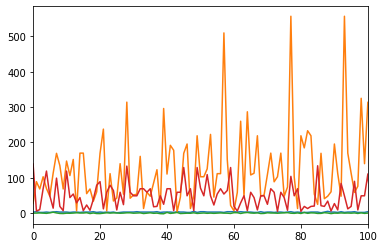

In [124]:
# before normalization
df_copy['Rooms'].plot().set_xlim(0, 100), df_copy['crime_C_average'].plot().set_xlim(0, 100), df_copy['travel_min_to_CBD_std_s'].plot().set_xlim(0, 100),df_copy['Age'].plot().set_xlim(0, 100)

##### finding
> The standardized data below, and observe the range and the center of the distribution for the standardised features. I found that both original and standardized data are in the same shape but shifted.

((0, 100), (0, 100), (0, 100), (0, 100))

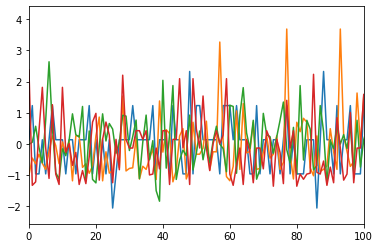

In [125]:
# before normalization
df_copy['Rooms_std_s'].plot().set_xlim(0, 100), df_copy['crime_C_average_std_s'].plot().set_xlim(0, 100), df_copy['travel_min_to_CBD_std_s'].plot().set_xlim(0, 100),df_copy['Age_std_s'].plot().set_xlim(0, 100)

##### take Rooms as an example
>Both of the results are exactly the same but shifted.

((0, 100), (0, 100))

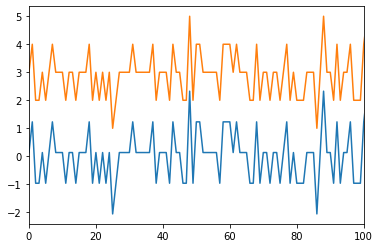

In [126]:
# Rooms
df_copy['Rooms_std_s'].plot().set_xlim(0, 100),df_copy['Rooms'].plot().set_xlim(0, 100)

In [127]:
# drop the unused columns
df_copy.drop(['Rooms_std_s', 'crime_C_average_std_s', 'travel_min_to_CBD_std_s','Age_std_s'], axis=1, inplace=True)

#### minmax normalization

In [128]:
minmax_scale = preprocessing.MinMaxScaler().fit(df_copy[['Rooms', 'crime_C_average','travel_min_to_CBD','Age']])
df_minmax = minmax_scale.transform(df_copy[['Rooms', 'crime_C_average','travel_min_to_CBD','Age']])
df_minmax[0:5]

array([[0.5       , 0.04736211, 0.35137564, 0.96478873],
       [0.75      , 0.15827338, 0.36299676, 0.02816901],
       [0.25      , 0.12104317, 0.44353166, 0.05633803],
       [0.25      , 0.1832534 , 0.33551085, 0.47183099],
       [0.5       , 0.12338129, 0.25853726, 0.82394366]])

#### Manually:
>Take Rooms as an instance. Firstly, find the min and max of "df_copy['Rooms']".

In [129]:
minA = df_copy.Rooms.min()
maxA = df_copy.Rooms.max()
minA, maxA

(1, 5)

*  Apply manually the min-max normalization to the first value of "df_copy['Rooms']", 

In [130]:
a = df_copy.Rooms[0] 
mma = (a - minA) / (maxA - minA)
mma

0.5

* and then compare the manually computed value with the one given by the MinMaxScaler above. (should be the same)

In [131]:
df_minmax[0][0]

0.5

* The two values mentioned above should be the same. Now, let's look at the normalization of the max value in df_copy['Rooms']. They are all 1.

In [132]:
a = df_copy[df_copy.Rooms == df_copy.Rooms.max()].Rooms
mma = (a - minA) / (maxA - minA)
mma

48     1.0
88     1.0
101    1.0
122    1.0
124    1.0
138    1.0
159    1.0
169    1.0
180    1.0
191    1.0
232    1.0
234    1.0
242    1.0
251    1.0
261    1.0
279    1.0
284    1.0
330    1.0
337    1.0
384    1.0
398    1.0
426    1.0
438    1.0
454    1.0
483    1.0
511    1.0
547    1.0
551    1.0
565    1.0
599    1.0
633    1.0
678    1.0
682    1.0
Name: Rooms, dtype: float64

In [133]:
print('Min-value after min-max scaling:\Rooms = {:.2f}, crime_C_average = {:.2f}, travel_min_to_CBD = {:.2f}, Age = {:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min(), df_minmax[:,2].min(), df_minmax[:,3].min()))
print('Max-value after min-max scaling:\Rooms = {:.2f}, crime_C_average = {:.2f}, travel_min_to_CBD = {:.2f}, Age = {:.2f}'      
      .format(df_minmax[:,0].max(), df_minmax[:,1].max(), df_minmax[:,2].max(), df_minmax[:,3].max()))

Min-value after min-max scaling:\Rooms = 0.00, crime_C_average = 0.00, travel_min_to_CBD = 0.00, Age = 0.00
Max-value after min-max scaling:\Rooms = 1.00, crime_C_average = 1.00, travel_min_to_CBD = 1.00, Age = 1.00


##### plot
>Now we can see the distribution for four different features as below.

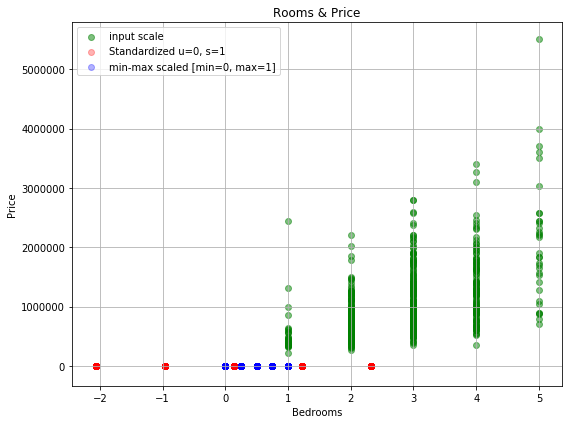

In [134]:
def plot():
    f = plt.figure(figsize=(8,6))

    plt.scatter(df_copy['Rooms'], df_copy['Price'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
             label='Standardized u=0, s=1', alpha=0.3)
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Rooms & Price')
    plt.xlabel('Bedrooms')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

plot()
plt.show()

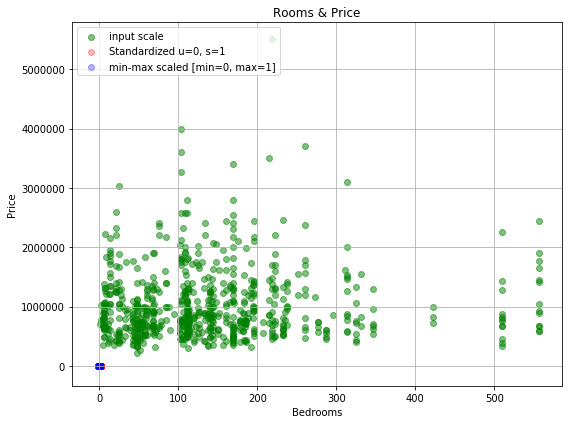

In [135]:
def plot():
    f = plt.figure(figsize=(8,6))

    plt.scatter(df_copy['crime_C_average'], df_copy['Price'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
             label='Standardized u=0, s=1', alpha=0.3)
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Rooms & Price')
    plt.xlabel('Bedrooms')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

plot()
plt.show()

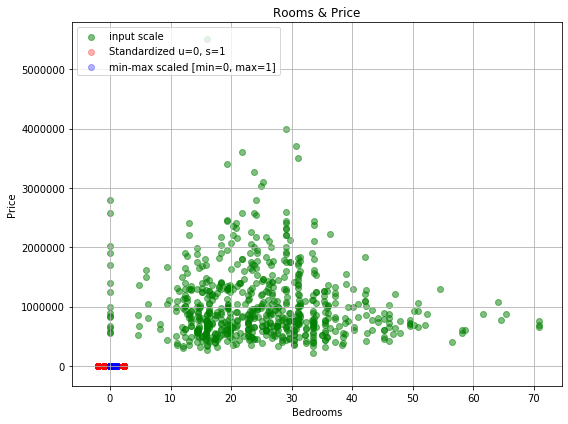

In [136]:
def plot():
    f = plt.figure(figsize=(8,6))

    plt.scatter(df_copy['travel_min_to_CBD'], df_copy['Price'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
             label='Standardized u=0, s=1', alpha=0.3)
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Rooms & Price')
    plt.xlabel('Bedrooms')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

plot()
plt.show()

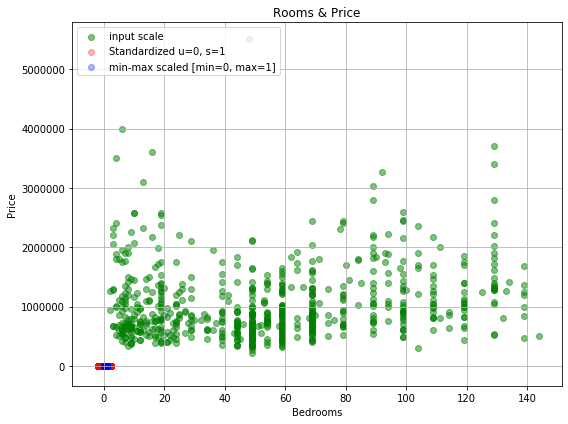

In [137]:
def plot():
    f = plt.figure(figsize=(8,6))

    plt.scatter(df_copy['Age'], df_copy['Price'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
             label='Standardized u=0, s=1', alpha=0.3)
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Rooms & Price')
    plt.xlabel('Bedrooms')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

plot()
plt.show()

> For further operations although I'm showing all the four variables but possibly categorical variables like Rooms and Age will not involve in to perform regression, regression likely operations on travel_time and crime_C_average since their numerical significance might play better with model building and expansion puposes.

### Data Transformation
>Before doing data transformation, we can see there is no any relationship between all of the features as below. Besides, the property type is only 'house' so it will be unmeaningful to use it. Consequently, I'll not consider property type in the following sections.

###  Power transformation

In [138]:
df_copy['price_power'] = df_copy.apply(lambda data: math.pow(data['Price'],2), axis=1)
df_copy['bed_power'] = df_copy.apply(lambda data: math.pow(data['Rooms'],2), axis=1)
df_copy['crime_power'] = df_copy.apply(lambda data: math.pow(data['crime_C_average'],2), axis=1)
df_copy['travel_power'] = df_copy.apply(lambda data: math.pow(data['travel_min_to_CBD'],2), axis=1)
df_copy['age_power'] = df_copy.apply(lambda data: math.pow(data['Age'],2), axis=1)
df_copy.head(n=3)

,index,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,...,crime_B_average,crime_C_average,year_num,Median_Price,over_priced,price_power,bed_power,crime_power,travel_power,age_power
0,0,ID778854256,13 Darling St,3,h,1200000.0,3/06/2017,1.0,2.0,440.0,...,371.0,27.333333,2017,1200000.0,1,1.440000e+12,9.0,747.111111,620.840278,19321.0
1,1,ID244478945,3/550 Fullarton Rd,4,t,600000.0,27/11/2016,2.0,1.0,231.0,...,1040.2,89.000000,2016,600000.0,1,3.600000e+11,16.0,7921.000000,662.585734,36.0
2,2,ID790990379,149 Spring St,2,h,850000.0,17/06/2017,1.0,2.0,494.0,...,380.2,68.300000,2017,702500.0,0,7.225000e+11,4.0,4664.890000,989.203954,100.0


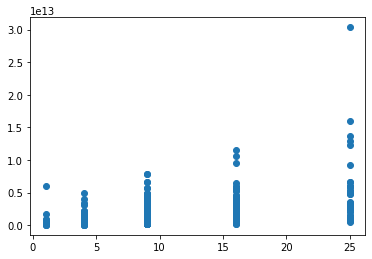

In [139]:
plt.scatter(df_copy['bed_power'],df_copy['price_power']) # and after

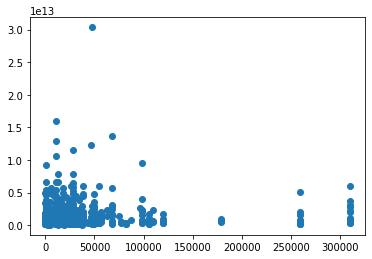

In [140]:
plt.scatter(df_copy['crime_power'],df_copy['price_power']) # and after

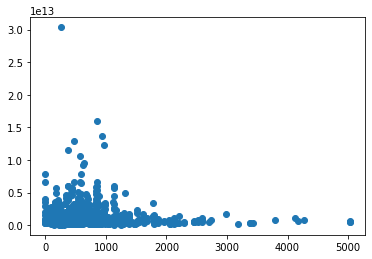

In [141]:
plt.scatter(df_copy['travel_power'],df_copy['price_power']) # and after

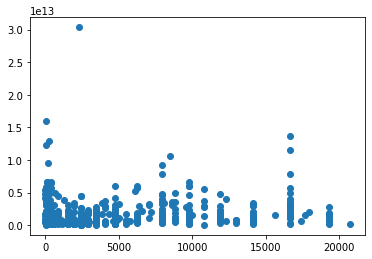

In [142]:
plt.scatter(df_copy['age_power'],df_copy['price_power']) # and after

In [143]:
# drop the unused columns
df_copy.drop(['price_power', 'travel_power','crime_power'], axis=1, inplace=True)

### 5) Sqrt transformation
>We cannot find any skew and relation in this part either.

In [144]:
df_copy['price_sqrt'] = df_copy.apply(lambda data: math.sqrt(data['Price']), axis=1)
df_copy['bed_sqrt'] = df_copy.apply(lambda data: math.sqrt(data['Rooms']), axis=1)
df_copy['crime_sqrt'] = df_copy.apply(lambda data: math.sqrt(data['crime_C_average']), axis=1)
df_copy['travel_sqrt'] = df_copy.apply(lambda data: math.sqrt(data['travel_min_to_CBD']), axis=1)
df_copy['age_sqrt'] = df_copy.apply(lambda data: math.sqrt(data['Age']), axis=1)
df_copy.head(n=3)

,index,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,...,year_num,Median_Price,over_priced,bed_power,age_power,price_sqrt,bed_sqrt,crime_sqrt,travel_sqrt,age_sqrt
0,0,ID778854256,13 Darling St,3,h,1200000.0,3/06/2017,1.0,2.0,440.0,...,2017,1200000.0,1,9.0,19321.0,1095.445115,1.732051,5.228129,4.991660,11.789826
1,1,ID244478945,3/550 Fullarton Rd,4,t,600000.0,27/11/2016,2.0,1.0,231.0,...,2016,600000.0,1,16.0,36.0,774.596669,2.000000,9.433981,5.073533,2.449490
2,2,ID790990379,149 Spring St,2,h,850000.0,17/06/2017,1.0,2.0,494.0,...,2017,702500.0,0,4.0,100.0,921.954446,1.414214,8.264381,5.608174,3.162278


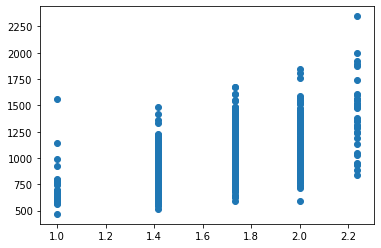

In [145]:
plt.scatter(df_copy['bed_sqrt'],df_copy['price_sqrt']) # and after

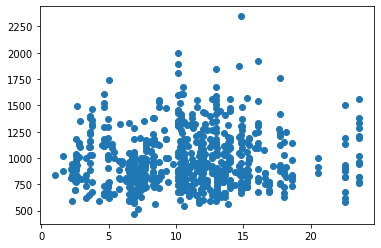

In [146]:
plt.scatter(df_copy['crime_sqrt'],df_copy['price_sqrt']) # and after

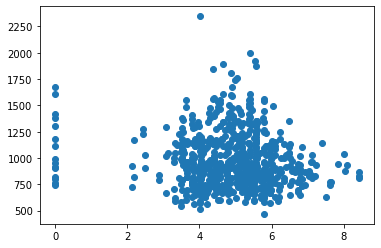

In [147]:
plt.scatter(df_copy['travel_sqrt'],df_copy['price_sqrt']) # and after

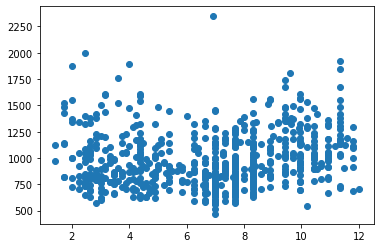

In [148]:
plt.scatter(df_copy['age_sqrt'],df_copy['price_sqrt']) # and after

In [149]:
# drop the unused columns
df_copy.drop(['price_sqrt', 'age_sqrt', 'travel_sqrt','crime_sqrt','bed_sqrt'], axis=1, inplace=True)

### 3) Log transformation
>After doing log transformation, we can find the features price, Rooms and age still have no relationship with each other.

In [150]:
df_copy['price_log'] = df_copy.apply(lambda data: math.log(data['Price']), axis=1)
df_copy['bed_log'] = df_copy.apply(lambda data: math.log(data['Rooms']), axis=1)
df_copy['crime_log'] = df_copy.apply(lambda data: math.log(data['crime_C_average']), axis=1)
df_copy['age_log'] = df_copy.apply(lambda data: math.log(data['Age']), axis=1)
df_copy.head(n=3)

,index,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,...,crime_C_average,year_num,Median_Price,over_priced,bed_power,age_power,price_log,bed_log,crime_log,age_log
0,0,ID778854256,13 Darling St,3,h,1200000.0,3/06/2017,1.0,2.0,440.0,...,27.333333,2017,1200000.0,1,9.0,19321.0,13.997832,1.098612,3.308107,4.934474
1,1,ID244478945,3/550 Fullarton Rd,4,t,600000.0,27/11/2016,2.0,1.0,231.0,...,89.000000,2016,600000.0,1,16.0,36.0,13.304685,1.386294,4.488636,1.791759
2,2,ID790990379,149 Spring St,2,h,850000.0,17/06/2017,1.0,2.0,494.0,...,68.300000,2017,702500.0,0,4.0,100.0,13.652992,0.693147,4.223910,2.302585


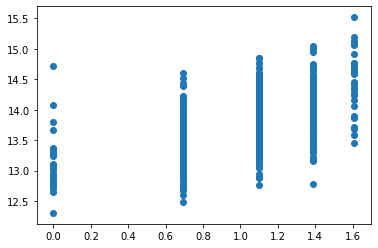

In [151]:
plt.scatter(df_copy['bed_log'],df_copy['price_log']) # and after

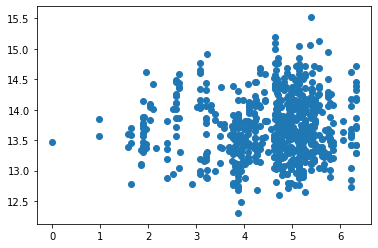

In [152]:
plt.scatter(df_copy['crime_log'],df_copy['price_log']) # and after

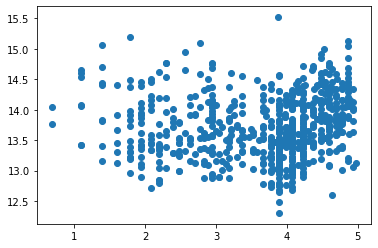

In [153]:
plt.scatter(df_copy['age_log'],df_copy['price_log']) # and after

##### prediction
>In general, the higher the R-squared, the better the model fits your data. After trying different permutations, I find R-squared which is the percentage of the response variable variation that is explained by a linear model is always low. That is to say, all of the features I test have little relationship with the house price.

In [154]:
df_copy['price_power'] = df_copy.apply(lambda data: math.pow(data['Price'],2), axis=1)
df_copy['bed_power'] = df_copy.apply(lambda data: math.pow(data['Rooms'],2), axis=1)
df_copy['crime_power'] = df_copy.apply(lambda data: math.pow(data['crime_C_average'],2), axis=1)
df_copy['travel_power'] = df_copy.apply(lambda data: math.pow(data['travel_min_to_CBD'],2), axis=1)
df_copy['age_power'] = df_copy.apply(lambda data: math.pow(data['Age'],2), axis=1)

In [157]:
X = df_copy.loc[:, ['crime_power', 'travel_power','bed_power']].values
y = df_copy.loc[:, ['Price']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model = LinearRegression()
model.fit(X_train, y_train)
print('Score: {}'.format(model.score(X_test, y_test)))

Score: 0.30608400927583945


### Conclusion
>In order to carry out the prediction, we should remove outliers to build the regression model. The fewer outliers in the model, the more accurate the prediction will be. In my perspective, after investigating different transformation methods, I think the log and sqrt transformation will work better than the others. This is because they can narrow the value of property price. Then, it could reduce the total outliers to make the prediction much more precise.<br>

>Moreover, we can find the distribution of values in the log and sqrt transformation is much more symmetrical than the others. In other words, the regression models of these two can predict the better result. However, scatters in the power transformation plot are distributed in a certain area which means the outcome of prediction won't be 100% accurate.